In [1]:
!pip install kshingle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for kshingle: filename=kshingle-0.10.0-py3-none-any.whl size=22432 sha256=17e0f50e89760f0e1cf55e350d72e7b0055bb53987bcfd4ae09c92d6a4b14c3e
  Stored in directory: /root/.cache/pip/wheels/af/c4/f9/460389ab2b762694cb48cb102cef7dcad6e4ee5066a3439039
Successfully built kshingle


### Ejemplos usando similitud de Jaccard

1. Similitud entre textos

Para el ejemplo haremos uso de tejas.

**Tejas (shingles)** 

Sea k>0 un entero. Las k-tejas (k-shingles) de un documento es el conjunto de todas las corridas (distintas) de k carácteres sucesivos.


Intuitivamente, para documentos/textos que sean similares, tendremos tejas similares . Tomemos de ejemplo el  RFC “_ABC010101DEF”, sus tejas  de longitud 1 y longitud 5 quedan de la siguiente forma.

Tejas de longitud 1: 
"_", "A", "B", "C", "0", "1", "D", "E", "F",

Tejas de longitud 5: 
"_ABC0", "ABC01", "BC010", "C0101", "01010", "10101", "0101D", "101DE", "01DEF"

Ejemplo. La oración "Ciencia de datos" con tejas de tamaño 3

In [2]:
import kshingle as ks

In [3]:
tejas = ks.shingleset_list("Ciencia de Datos", [3])
tejas

{' Da',
 ' de',
 'Cie',
 'Dat',
 'a d',
 'ato',
 'cia',
 'de ',
 'e D',
 'enc',
 'ia ',
 'ien',
 'nci',
 'tos'}

In [4]:
len(tejas)

14

In [5]:
type(tejas)

set

**Similitud de tejas**

Inicialmente podríamos pensar que usar tejas más finas nos lleva aresultados más acertados, pero no siempre es el caso. Se debe hacer prueba y error con el tipo de datos que tengamos.



In [6]:
def jaccard_sim(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

Recordemos que la similitud de Jaccard de dos conjuntos A y B, cuantifica que tan cerca está la unión de A y B de su intersección.

Ejemplo con distintos RFCs, para identificar RFCs similares. El objetivo es identificar aquellos RFCs que pudieran tener un typo.

![tejas0.PNG](attachment:tejas0.PNG)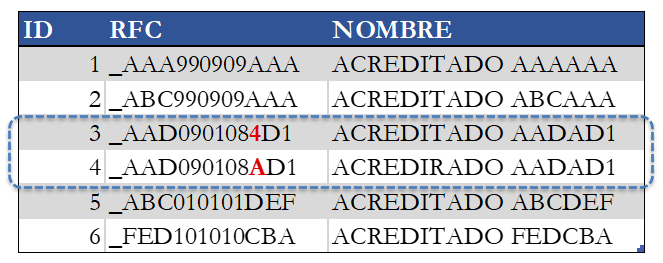

**Participación alumnos**. ¿Qué dificultades identifican en el problema?, ¿qué soluciones tradicionales se les ocurren?

En el siguiente ejemplo observamos como utilizar tejas de longitud 1 puede llevarnos a resultados erróneos, veamos la primera comparación de la tabla, se trata de acreditados distintos que comparten los mismos caracteres en distinto orden, por lo que obtenemos la similitud más alta (uno) al utilizar tejas de longitud 1. 

Utilizar tejas de mayor longitud resuelve el problema anterior.

La similitud para distinto tamaño de tejas es

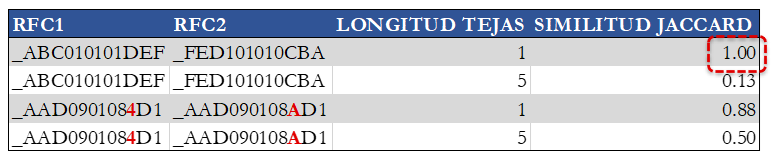

In [7]:
rfc1 = "_ABC010101DEF"
rfc2 = "_FED101010CBA"

In [8]:
tejas_k1_rfc1 = ks.shingleset_list(rfc1, [1])
tejas_k1_rfc1

{'0', '1', 'A', 'B', 'C', 'D', 'E', 'F', '_'}

In [9]:
len(tejas_k1_rfc1)

9

In [10]:
tejas_k5_rfc1 = ks.shingleset_list(rfc1, [5])
tejas_k5_rfc1

{'01010',
 '0101D',
 '01DEF',
 '10101',
 '101DE',
 'ABC01',
 'BC010',
 'C0101',
 '_ABC0'}

In [11]:
len(tejas_k5_rfc1)

9

In [12]:
tejas_k5_rfc2 = ks.shingleset_list(rfc2, [5])
tejas_k5_rfc2

{'01010',
 '010CB',
 '10101',
 '1010C',
 '10CBA',
 'D1010',
 'ED101',
 'FED10',
 '_FED1'}

In [13]:
jaccard_sim(tejas_k5_rfc1,tejas_k5_rfc2)

0.125

In [14]:
# tejas de tamaño 1
tejas_k1_rfc1 = ks.shingleset_list(rfc1, [1])
tejas_k1_rfc2 = ks.shingleset_list(rfc2, [1])
jaccard_sim(tejas_k1_rfc1,tejas_k1_rfc2)

1.0

**Ejercicio**. Calcular la similutud para tejas de tamaño 3

In [15]:
tejas_k3_rfc1 = ks.shingleset_list(rfc1, [3])
tejas_k3_rfc2 = ks.shingleset_list(rfc2, [3])
jaccard_sim(tejas_k3_rfc1,tejas_k3_rfc2)

0.125

In [16]:
tejas_k3_rfc1

{'010', '01D', '101', '1DE', 'ABC', 'BC0', 'C01', 'DEF', '_AB'}

In [17]:
tejas_k3_rfc2

{'010', '0CB', '101', '10C', 'CBA', 'D10', 'ED1', 'FED', '_FE'}

Calcular similitud para RFCs con typo. Nota: en la práctica esto no lo sabríamos, es lo que queremos resolver.

In [18]:
rfc3 = '_AAD0901084D1'
rfc4 = '_AAD090108AD1'

In [19]:
# tejas de tamaño 1
tejas_k1_rfc3 = ks.shingleset_list(rfc3, [1])
tejas_k1_rfc4 = ks.shingleset_list(rfc4, [1])
jaccard_sim(tejas_k1_rfc3,tejas_k1_rfc4)

0.875

In [20]:
# tejas de tamaño 5
tejas_k5_rfc3 = ks.shingleset_list(rfc3, [5])
tejas_k5_rfc4 = ks.shingleset_list(rfc4, [5])
jaccard_sim(tejas_k5_rfc3,tejas_k5_rfc4)

0.5

In [21]:
# tejas de tamaño 3
tejas_k3_rfc3 = ks.shingleset_list(rfc3, [3])
tejas_k3_rfc4 = ks.shingleset_list(rfc4, [3])
jaccard_sim(tejas_k3_rfc3,tejas_k3_rfc4)

0.5714285714285714

**Participación alumnos**

- ¿Qué aplicaciones se les ocurren?
- ¿Consideran necesario algún tipo de pre procesamiento?

---

2. Similitud entre listas de palabras

Los datos de este ejemplo provienen del capítulo 4 del libro **Data Science at the Command Line** by Jeroen Jannsens

In [3]:
!curl -sL "https://www.gutenberg.org/files/11/11-0.txt" | head -n 50

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-

In [23]:
%%bash
curl -sL "https://www.gutenberg.org/files/11/11-0.txt" | 
tr '[:upper:]' '[:lower:]' | 
grep -oE "[a-z\']{2,}" | 
sort | 
uniq -c | 
sort -nr | 
head -n 10

   1839 the
    942 and
    811 to
    638 of
    610 it
    553 she
    486 you
    462 said
    435 in
    403 alice


La siguiente es una lista de stopwords en inglés

In [25]:
%%bash
curl -sL "https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt" | sort | head -n 25

10
39
a
able
ableabout
about
above
abroad
abst
accordance
according
accordingly
across
act
actually
ad
added
adj
adopted
ae
af
affected
affecting
affects
after


Eliminado _stopwords_ queda de la siguiente manera

Alice's Adventures in Wonderland

In [27]:
wonderland = ['alice','gutenberg','project','queen','time','king','turtle','mock','hatter','gryphon']


Through the Looking-Glass

In [28]:
glass = ['alice','queen','gutenberg','project','time','red','white','king','head','knight']

In [29]:
jaccard_sim(wonderland,glass)

0.42857142857142855

In [30]:
#interseccion
interseccion = len(list(set(wonderland).intersection(glass)))
interseccion

6

In [31]:
list(set(wonderland).intersection(glass))

['king', 'project', 'queen', 'gutenberg', 'alice', 'time']

In [32]:
#union
union = (len(wonderland) + len(glass)) - interseccion
union

14